In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
import math

In [115]:
def l_1(x,y):
    return np.sum(abs(x-y),axis=0)
def l_2(x,y):
    return np.sum((x-y)**2,axis=0)
def l_infty(x,y):
    return np.max(abs(x-y),axis=0)

In [116]:
def nnClassifier(vecX,matX,vecY,metric):
    return vecY[np.argmin(metric(matX,vecX))]

In [117]:
def x_classifier(X,f):
    X_prime=X.copy()
    return np.apply_along_axis(f,0,X_prime)

In [118]:
def show_pic(x,y,metrics,f,maxcord=151):
    fig, axs = plt.subplots(1,len(metrics)+1,dpi=maxcord)
    x_in=y_in=maxcord
    elements=x_in*y_in
    l=np.array([[(0,0,0) for x in range(x_in)]for y in range(y_in)])
    lc=np.array([[(0,0,0) for x in range(x_in)]for y in range(y_in)])
    for cx in range(x_in):
        for cy in range(y_in):
            color=f([cx,cy])
            lc[cy][cx]=(255*color,0,0)
    axs[-1].imshow(lc,origin='lower')
    for i in range(len(metrics)):
        for cx in range(x_in):
            for cy in range(y_in):
                color=nnClassifier(np.array([[cx],[cy]]),x,y,metrics[i])
                l[cy][cx]=(255*color,0,0)
        print("Accuracy:",((l==lc).sum()-2*elements)/elements)
        axs[i].imshow(l,origin='lower')  
    plt.show()

In [119]:
n_samples=200
maxcord=151

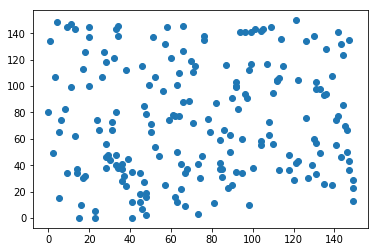

In [120]:
X=np.random.randint(0,maxcord,size=(2,n_samples))
plt.scatter(X[0,:],(X[1,:]))
plt.show()

# Y based on $l_1$
This should be a diamond.

In [121]:
f_1=lambda x:(abs(x[0]-maxcord/2)+abs(x[1]-maxcord/2)>=50)

Accuracy: 0.958072014385334
Accuracy: 0.9582913030130258


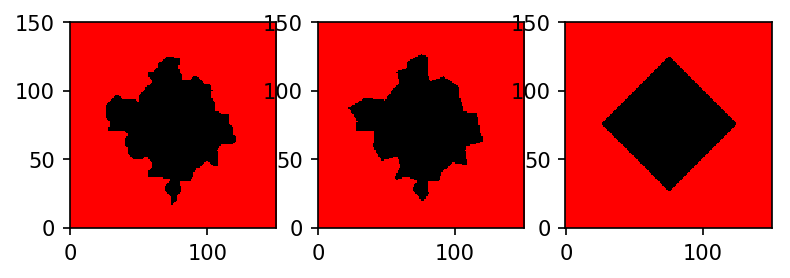

In [122]:
show_pic(X,x_classifier(X,f_1),[l_1,l_2],f_1)

Accuracy: 0.958072014385334
Accuracy: 0.9585983070917942


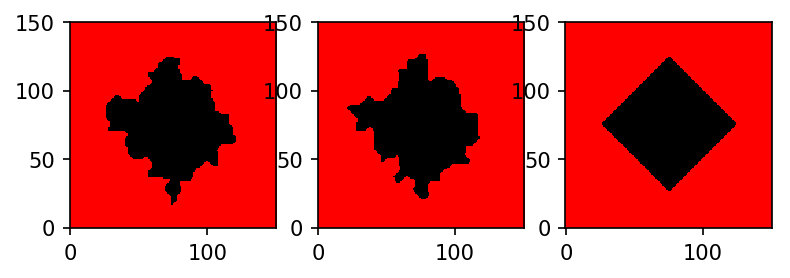

In [123]:
show_pic(X,x_classifier(X,f_1),[l_1,l_infty],f_1)

# Y based on $l_2$
This should be a circle.

In [124]:
f_2=lambda x:(abs(x[0]-maxcord/2)**2+abs(x[1]-maxcord/2)**2>=2500)

Accuracy: 0.9479847375115127
Accuracy: 0.946405859392132


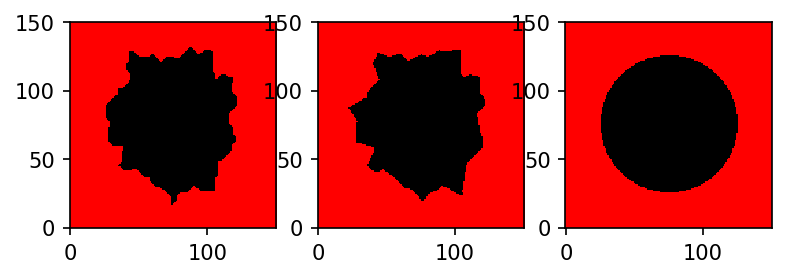

In [125]:
show_pic(X,x_classifier(X,f_2),[l_1,l_2],f_2)

Accuracy: 0.9479847375115127
Accuracy: 0.9440813999385992


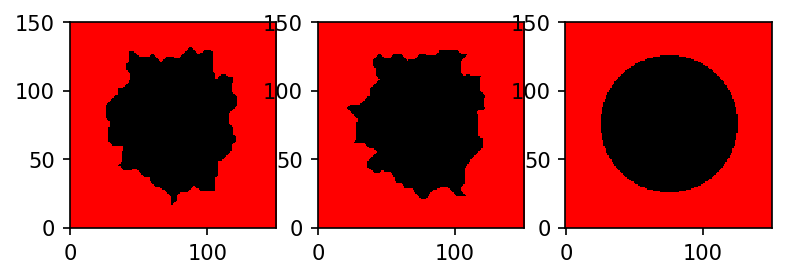

In [126]:
show_pic(X,x_classifier(X,f_2),[l_1,l_infty],f_2)

# Y based on $l_\infty$
This should be a square.

In [127]:
f_infty=lambda x:max(abs(x[0]-maxcord/2),abs(x[1]-maxcord/2))>=50

Accuracy: 0.9395201964826104
Accuracy: 0.9404850664444542


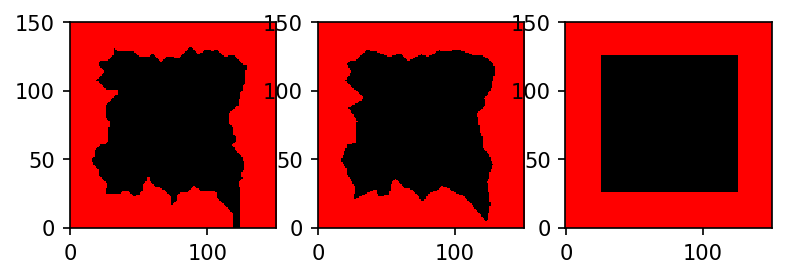

In [128]:
show_pic(X,x_classifier(X,f_infty),[l_1,l_2],f_infty)

Accuracy: 0.9395201964826104
Accuracy: 0.9401342046401474


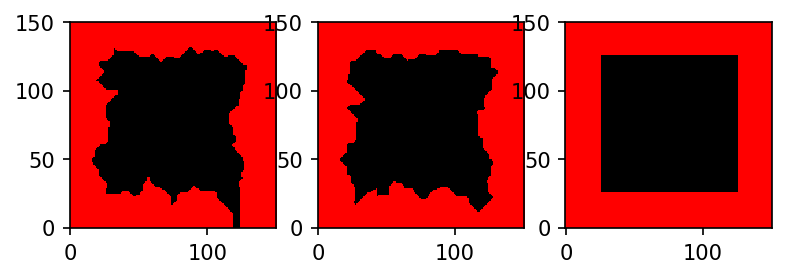

In [129]:
show_pic(X,x_classifier(X,f_infty),[l_1,l_infty],f_infty)

# Mixed Y

In [130]:
f_1_2=lambda x:(abs(x[0]-maxcord/2)+abs(x[1]-maxcord/2)<=25) or (abs(x[0]-maxcord/2)**2+abs(x[1]-maxcord/2)**2>=2500)

Accuracy: 0.9328538222007806
Accuracy: 0.933029253102934


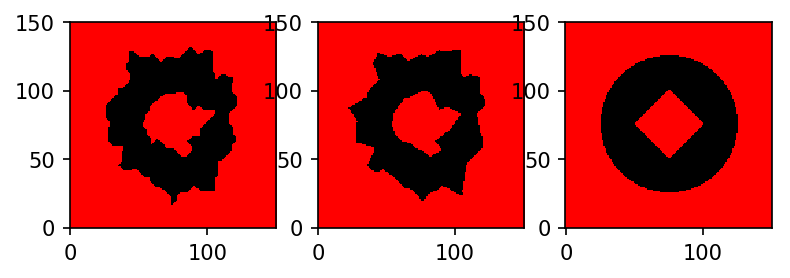

In [131]:
show_pic(X,x_classifier(X,f_1_2),[l_1,l_2],f_1_2)

Accuracy: 0.9328538222007806
Accuracy: 0.9316696636112451


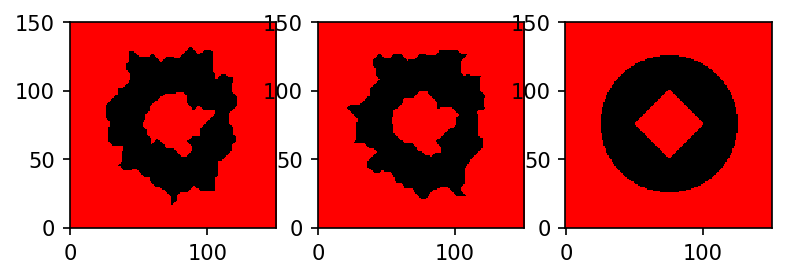

In [132]:
show_pic(X,x_classifier(X,f_1_2),[l_1,l_infty],f_1_2)

----------------------

In [133]:
f_1_infty=lambda x:(abs(x[0]-maxcord/2)+abs(x[1]-maxcord/2)<=25) or max(abs(x[0]-maxcord/2),abs(x[1]-maxcord/2))>=50

Accuracy: 0.9243892811718785
Accuracy: 0.9271084601552564


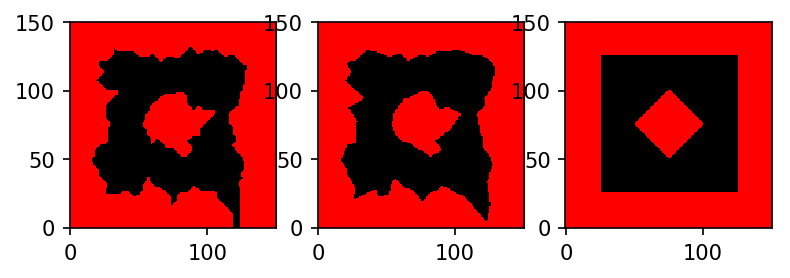

In [134]:
show_pic(X,x_classifier(X,f_1_infty),[l_1,l_2],f_1_infty)

Accuracy: 0.9243892811718785
Accuracy: 0.9277224683127933


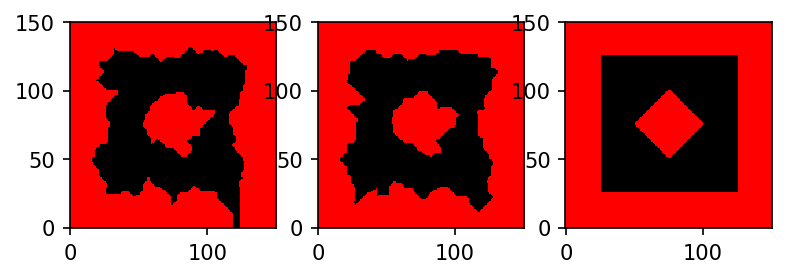

In [135]:
show_pic(X,x_classifier(X,f_1_infty),[l_1,l_infty],f_1_infty)

-----------------
# Worst case

In [136]:
f_mod_2=lambda x:x[0]%7!=0 and x[1]%5!=0

Accuracy: 0.5576071224946274
Accuracy: 0.5505021709574142


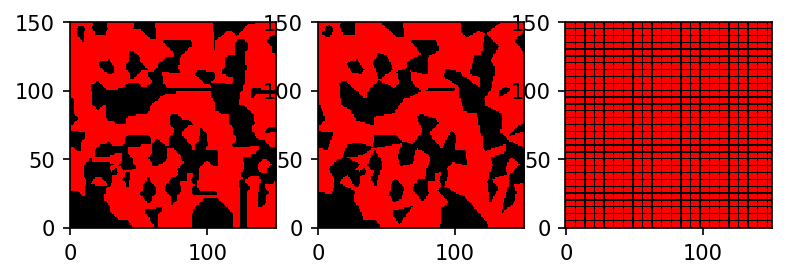

In [137]:
show_pic(X,x_classifier(X,f_mod_2),[l_1,l_2],f_mod_2)

Accuracy: 0.5576071224946274
Accuracy: 0.5490110082891101


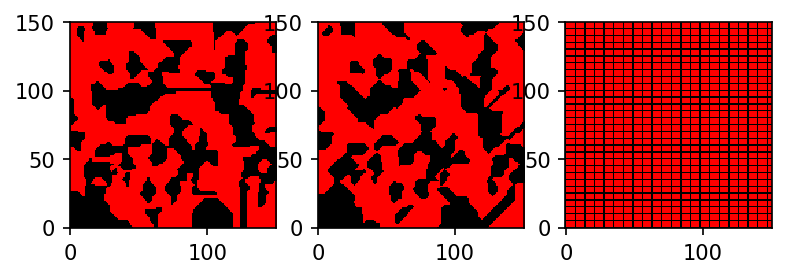

In [138]:
show_pic(X,x_classifier(X,f_mod_2),[l_1,l_infty],f_mod_2)

# New and improved

In [139]:
data=make_blobs(centers=2)
data

(array([[ -9.62293737,   6.47407739],
        [ -7.40424428,   5.26457004],
        [ 10.67930759,  -0.41898356],
        [ -7.60989018,   5.9845814 ],
        [ -8.56487368,   4.90840986],
        [-10.18232931,   3.62871262],
        [  8.03838115,   0.51869197],
        [ -8.19681861,   5.04462794],
        [ -6.80990489,   2.90969557],
        [ -8.87206122,   4.97309248],
        [  8.62804361,  -1.13338161],
        [ -8.18888885,   5.59270511],
        [  9.8699352 ,  -2.01834802],
        [ -8.63223041,   4.11294208],
        [  9.97799327,  -1.23452574],
        [ -7.59319704,   3.67634611],
        [ -9.93386696,   5.91664534],
        [ 10.70050632,  -0.73645391],
        [ -7.05950141,   3.97320665],
        [ -8.87445515,   2.95758603],
        [  7.60061097,  -0.38167134],
        [  7.29621982,  -0.59512621],
        [  9.68647382,   0.78814616],
        [ 10.65356182,   0.07048319],
        [  8.87518727,  -0.11014404],
        [ -8.27740524,   6.20355322],
        [  7

In [145]:
def eval_metric(data,metric,split=(2,3)):
    n = len(data[1])
    i_last=math.floor(n*split[0]/split[1])
    tests=n-i_last
    train=data[0][:i_last], data[1][:i_last]
    test=data[0][i_last:], data[1][i_last:]
    res=[nnClassifier(test[0][i],train[0],train[1],metric) for i in range(tests)]
    return sum([test[1][i]==res[i] for i in range(tests)])/tests
def print_eval(data,metric,split=(2,3)):
    print(f"{metric.__name__} : {eval_metric(data,metric,split)}")

In [146]:
data=make_blobs(centers=2)
print_eval(data,l_1)
print_eval(data,l_2)
print_eval(data,l_infty)

l_1 : 0.4411764705882353
l_2 : 0.4411764705882353
l_infty : 0.4411764705882353


In [150]:
def eval_metrics(metrics, n=100, split=(2,3), f=lambda: make_blobs(centers=2)):
    for metric in metrics:
        data = [eval_metric_blob(f(),metric) for _ in range(n)]
        print(f"min: {min(data)}, max: {max(data)}, avg.: {sum(data)/n} | {metric.__name__}")

In [151]:
eval_metrics([l_1,l_2,l_infty])

min: 0.29411764705882354, max: 0.7058823529411765, avg.: 0.4923529411764705 | l_1
min: 0.29411764705882354, max: 0.6470588235294118, avg.: 0.49441176470588255 | l_2
min: 0.20588235294117646, max: 0.7058823529411765, avg.: 0.4923529411764707 | l_infty


In [153]:
eval_metrics([l_1,l_2,l_infty],f=make_classification)

min: 0.29411764705882354, max: 0.6764705882352942, avg.: 0.48882352941176455 | l_1
min: 0.29411764705882354, max: 0.6764705882352942, avg.: 0.4879411764705883 | l_2
min: 0.2647058823529412, max: 0.6764705882352942, avg.: 0.4952941176470587 | l_infty
